In [2]:
# Imports

import numpy as np
import matplotlib.pylab as plt
import scipy as sp
import scipy.sparse as spsp
import time



---



On considère la fonction $J(x, y) = 2x^2 + 3xy + 2y^2$ définie sur $\mathbf{R}^2$. On définit le cadran $Q = \{ (x, y) ~~ \vert ~~ x \leq -\frac{1}{2}, ~ y \leq -\frac{1}{2} \}$.

$1$) **Analyse théorique du problème.**

Nous cherchons tout d'abord la solution du problème de minimisation de $J$ sans contrainte. Justifions tout d'abord l'existence d'un tel minimiseur. $J$ est $C^{\infty}$ car elle est polynomiale, en particulier elle est continue sur le fermé $\mathbf{R^2}$. De plus, $J$ est coercive. En effet, $J(x, y)  \geq 2x^2 + 2y^2 -\frac{3}{2}(x^2 + y^2) = 2 \vert \vert (x, y) \vert \vert^2_2 - \frac{3}{2}||(x, y)||^2_2 = \frac{1}{2} \vert \vert (x, y) \vert \vert_2^2$, d'où la coercivité. Nous déduisons que le problème d'optimisation admet au moins une solution $(x^*, y^*)$ dans $R^2$ (et meme dans $Q$ car $Q$ est un fermé). Dans $\mathbf{R^2}$, les conditions d'optimalités sont données par $\nabla J(x^*, y^*) = 0$ (nécéssairement). On trouve facilement que $(0, 0)$ est l'unique solution du problème car la matrice associée à $J$ est inversible.

Nous avons vu précédémment que le problème d'optimisation avec contrainte admet aussi une solution dans $Q$ puisque $Q$ est un fermé par intersection de fermés et par coercivité de $J$. On notera $(x^*, y^*)$ la solution. Supposons qu'elle ne soit pas sur le bord de $Q$, alors il existerait un ouvert $U$ dans $Q$ tel que $\nabla J(x^*, y^*) = 0$ dans cet ouvert. Cependant, nous avons précédémment que la seule solution est $(0, 0)$ qui n'est pas dans $Q$ donc contradiction. Donc la solution se trouve nécéssairement sur le bord de $Q$. On déduit donc que $x = -\frac{1}{2}$ ou $y = -\frac{1}{2}$. En fixant $x =  -\frac{1}{2}$ (ou $y = -\frac{1}{2}$ puisque c'est symétrique), on obtient $J(-\frac{1}{2}, y) = \frac{1}{2} - \frac{3}{2}y + 2 y^2$. C'est une parabole dont le minimun est atteint sur $Q$ en $y = -\frac{1}{2}$ (ou $x = -\frac{1}{2}$ en prenant l'autre cas). On déduit que le problème d'optimisation est atteint en $(-\frac{1}{2}, -\frac{1}{2})$.

$2$) **Méthode du gradient projeté.**

On veut résoudre le problème d'optimisation sous contrainte à l'aide de la méthode du gradient projeté. Nous aurons donc besoin d'une fonction qui nous renvoie la projection d'un élément dans $\mathbf{R^2}$ sur $Q$.

In [3]:
# projection de (x, y) sur Q.
def p_Q(x):

  p = np.zeros(2)
  p[0] = min(x[0], -1./2.)
  p[1] = min(x[1], -1./2.)

  return p

# Test de la projection.

u = [-3, 85]
print(p_Q(u)) # ok.

[-3.  -0.5]


On implémente ensuite la fonction $J$.

In [5]:
def J(x, y):
  return 2 * x**2 + 2 * y**2 + 3 * x * y

matrix_A = np.array([[4., 3], [3, 4]]) # Matrice associée à J.

In [8]:
def grad_projete(rho, x_0):

  it_max = 100000
  it = 0 

  x_last = x_0
  d = - matrix_A @ x_last # direction gradient.
  x_now = p_Q(x_last + rho * d)

  x = [x_0] # liste des itérations x^k.
  err = [] # liste d'erreurs.

  x.append(x_now)
  err.append(np.linalg.norm(x_now - x_last))

  while ((np.linalg.norm(x_now - x_last) > 1e-12) and (it < it_max)):

    it += 1
    x_last = x_now
    d = - matrix_A @ x_last 
    x_now = p_Q(x_last + rho * d)
  
    x.append(x_now)
    err.append(np.linalg.norm(x_now - x_last))
    
  return x, err, it

In [10]:
# Un test de notre fonction.

matrix_A = np.array([[4., 3], [3, 4]]) # Matrice associée à J.
eigenvalues, eigenvectors = np.linalg.eig(matrix_A)
np.sort(eigenvalues)
lambda1 = eigenvalues[0]
lambdan = eigenvalues[-1]

pas = 2./(lambda1 + lambdan)

x_0 = [-455, 5]
x_appro, err, it = grad_projete(pas, x_0)
x_exact = (-1./2.)*np.ones(2)

print("Good solution ? : ", (np.linalg.norm(x_appro[-1] - x_exact) < 1e-8))

print("Iteration : ", it)

print("Good error ? :", (np.linalg.norm(x_appro[-1] - x_appro[-2]) < 1e-8) )

print("Solution = ", x_appro[-1]) # Ok.

Good solution ? :  True
Iteration :  2
Good error ? : True
Solution =  [-0.5 -0.5]


Nous allons ensuite représenter les différentes itérations $x^k$.

Nombre d'itération pour pas non optimale :  2706
Nombre d'itération pour pas optimale :  1


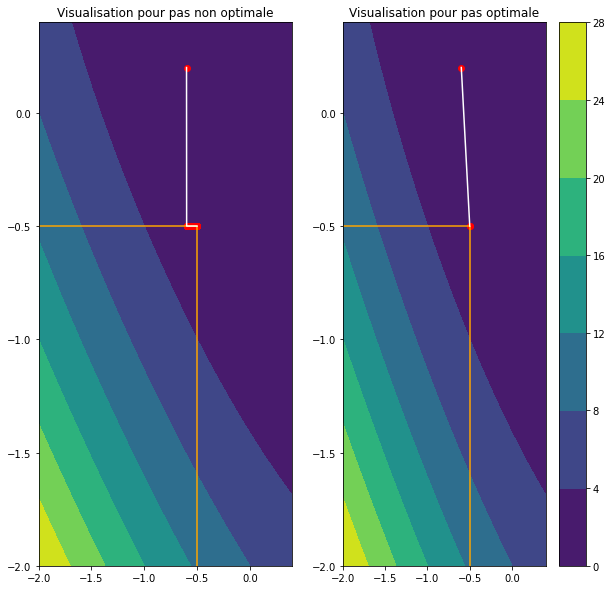

In [11]:
fig, ax = plt.subplots(1, 2, figsize = (10,10))

# Notre quadrillage, à adapter selon besoin.

x = np.arange(-2.0, 0.5, 0.1)
y = np.arange(-2.0, 0.5, 0.1)

xx, yy = np.meshgrid(x,y);

Z = J(xx, yy)

# Lignes de niveaux : 
h = ax[0].contourf(x, y, Z)
h = ax[1].contourf(x, y, Z)
fig.colorbar(h)

# Les itérations : 

# On prend un pas non optimale pour voir les différentes itérations plus explicitement.
pas = 1e-5

x_0 = [-0.6, 0.2]
x_appro, err, it = grad_projete(pas, x_0)
x_exact = (-1./2.) * np.ones(2)
print("Nombre d'itération pour pas non optimale : ", it)

ax[0].scatter( np.array(x_appro)[:,0] , np.array(x_appro)[:,1], color = 'red')
ax[0].plot( np.array(x_appro)[:,0] , np.array(x_appro)[:,1], color = 'white', linestyle = 'solid');
ax[0].set_title("Visualisation pour pas non optimale")

# Comparaison avec pas optimale.
pas = 2./(lambda1 + lambdan)

x_0 = [-0.6, 0.2]
x_appro, err, it = grad_projete(pas, x_0)
x_exact = (-1./2.) * np.ones(2)
print("Nombre d'itération pour pas optimale : ", it)

ax[1].scatter( np.array(x_appro)[:,0] , np.array(x_appro)[:,1], color = 'red')
ax[1].plot( np.array(x_appro)[:,0] , np.array(x_appro)[:,1], color = 'white', linestyle = 'solid');
ax[1].set_title("Visualisation pour pas optimale")

# Pour visualiser le bord de Q.

ax[0].hlines(-1/2, -2, -1/2, colors='orange', linestyles='solid')
ax[0].vlines(-1/2, -2, -1/2, colors='orange', linestyles='solid', label=r'$\partial Q$');

ax[1].hlines(-1/2, -2, -1/2, colors='orange', linestyles='solid')
ax[1].vlines(-1/2, -2, -1/2, colors='orange', linestyles='solid', label=r'$\partial Q$');

On remarque clairement que lorsqu'on utilise le pas optimale, la convergence est très rapide.



---



$3$) **Méthode de pénalisation**

Nous allons mettre en place une fonction de pénalisation $\phi$. On se donne ainsi la fonction 
\begin{array}
$\phi(x,y)=\max^2(x+\frac{1}{2},0)+\max^2(y+\frac{1}{2},0)
\end{array}
associée à nos contraintes d'inégalités. Elle est bien continue sur $\mathbf{R}^2$, positive et vaut $0$ sur $Q$. Le gradient de $\phi$ (comme $\phi$ est différentiable) est donné par 
\begin{array}
$\nabla \phi(x, y) = (2\max(x + \frac{1}{2}, 0),  2\max(x + \frac{1}{2}, 0))^T
\end{array}
 On obtient ainsi une nouvelle fonction de coût, pour tout $\varepsilon >0$ nous avons, $J_\varepsilon (x,y) = J(x,y)+ \frac{1}{2\varepsilon} \phi(x,y) = 2x^2+3xy+2y^2 + \frac{1}{\varepsilon} \bigg[ \max^2(x+1/2,0)+\max^2(y+1/2,0) \bigg]$. Le gradient associé est donc donné par : $\nabla J_{\varepsilon}(x, y) = (4x + 3y + \frac{2}{\varepsilon}\max(x+\frac{1}{2},0), 3x + 4y + \frac{2}{\varepsilon}\max(y+\frac{1}{2}, 0))^T$.

Nous voulons ensuite tracer les courbes de niveaux de la nouvelle fonction de coût et son gradient, pour plusieurs valeurs de $\varepsilon$.

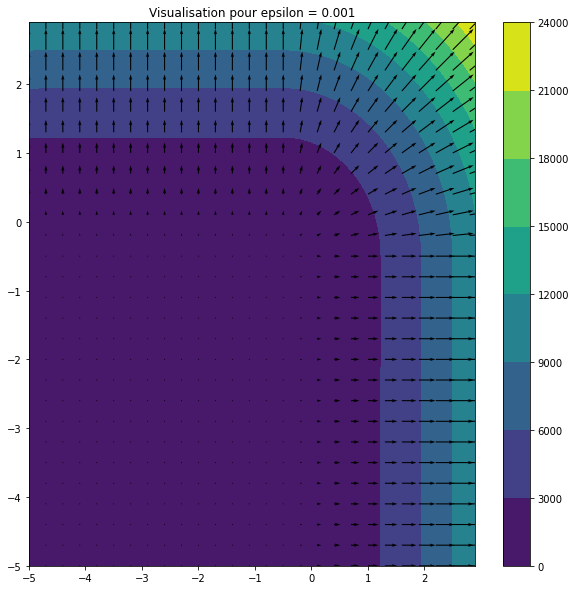

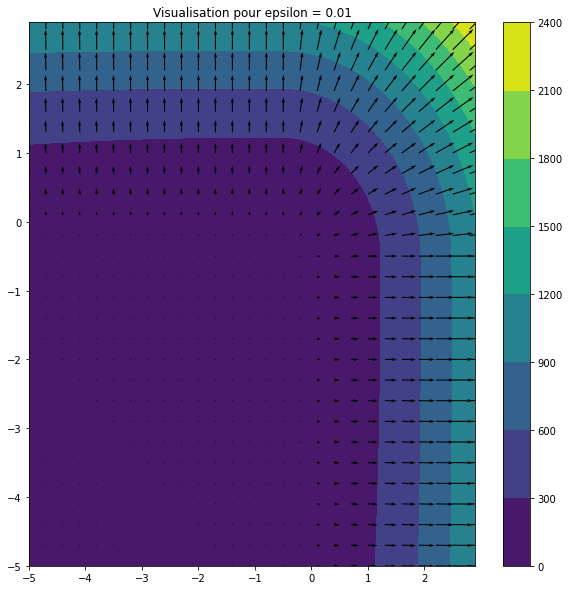

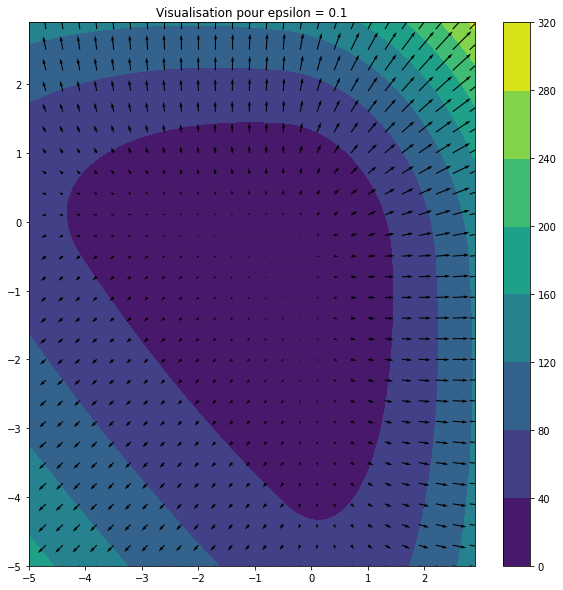

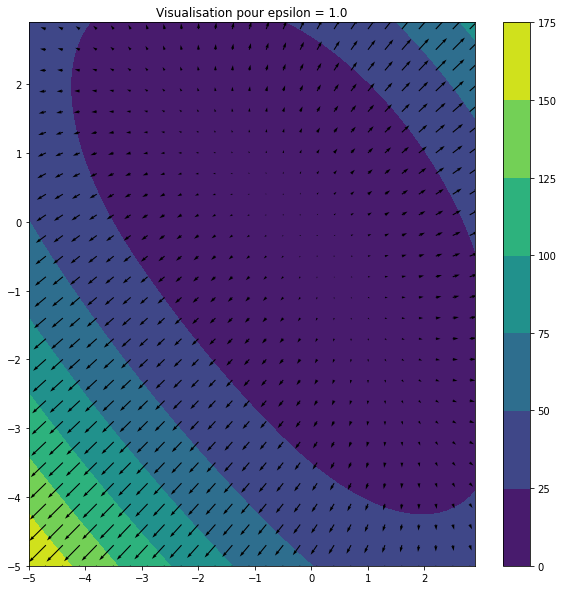

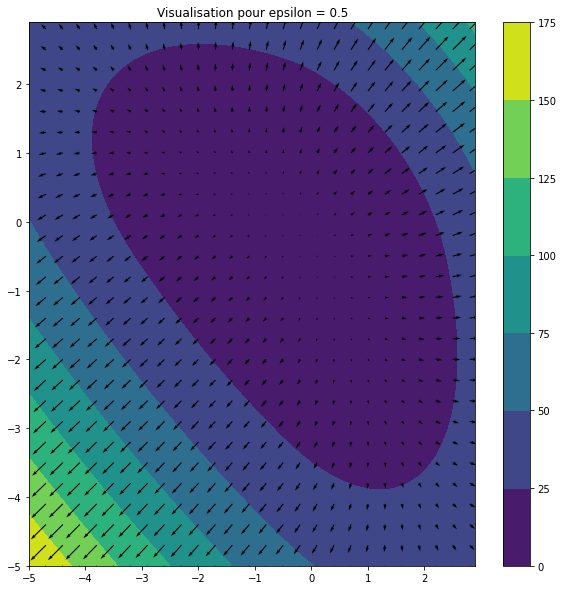

In [12]:
# Nous avons besoin d'une fonction qui donne le maximum entre une matrice A
# quelconque et la matrice nulle pour chaque coefficient. (pour la visualisation)

def max_matrix(A):
  U = np.copy(A)
  for i in range(np.shape(A)[0]):
    for j in range(np.shape(A)[1]):
      U[i,j] = max(A[i,j],0)

  return U


# Liste de epsilon : 
eps = [10e-4, 10e-3, 10e-2, 10e-1, 0.5]

# Pour avoir une fleche sur trois.
step = 3

for epsilon in eps :
  # Representation des lignes de niveau de J et du champ de vecteur du gradient.

  fig, ax = plt.subplots(figsize = (10,10))
  ax.set_title("Visualisation pour epsilon = " +  str(epsilon))

  # Domaine.

  x1 = np.arange(-5.0, 3.0, 0.1)
  x2 = np.arange(-5.0, 3.0, 0.1)

  xx1, xx2 = np.meshgrid(x1, x2);

  # Lignes de niveaux.
  Z = J(xx1, xx2) + (1./epsilon) * (max_matrix(xx1 + 1./2.)**2 + max_matrix(xx2 + 1./2.)**2 );

  h = plt.contourf(x1, x2, Z)
  fig.colorbar(h)

  # Champs de vecteur.
  U = 4*xx1+3*xx2 + (2./epsilon) * max_matrix(xx1 + 1./2.)
  V = 3*xx1+4*xx2 + (2./epsilon) * max_matrix(xx2 + 1./2.)

  Q = plt.quiver(xx1[::step, ::step], xx2[::step, ::step], U[::step, ::step], V[::step, ::step], units='width')

Lorsqu'on agrandit $\varepsilon$ on voit tout d'abord que la fonction prend des valeurs de plus en plus petite. Ensuite nous observons que lorsque $\varepsilon$ augmente, les valeurs les plus petites se concentrent autour d'une ellipse aplati centré en $(0.5, 0.5)$.

Nous allons ré-implémenter la méthode du gradient à pas fixe pour résoudre le problème sans contrainte avec la pénalisation. 

In [13]:
def grad_penalise(epsilon, rho, x_0):

  it_max = 100000
  it = 0

  x_last = x_0 
  d = - matrix_A @ x_last - np.array([(2./epsilon) * np.max(x_last[0] + (1./2.), 0) , (2./epsilon) * np.max(x_last[1] + (1./2.), 0) ])
  x_now = x_last + rho * d

  x = [x_0] # liste des itérations x^k.
  err = [] # liste d'erreurs.

  x.append(x_now)
  err.append(np.linalg.norm(x_now - x_last))

  while ((np.linalg.norm(x_now - x_last) > 1e-12) and (it < it_max)):

    it += 1
    x_last = x_now
    d = - matrix_A @ x_last - np.array([(2./epsilon) * np.max(x_last[0] + (1./2.), 0) , (2./epsilon) * np.max(x_last[1] + (1./2.), 0) ])
    x_now = x_last + rho * d
  
    x.append(x_now)
    err.append(np.linalg.norm(x_now - x_last))

  return x, err, it

Nous allons tout d'abord tester notre fonction pour une pénalisation forte c'est à dire $\varepsilon = 10^{-4}$.

In [14]:
x_0 = [-0.3,0.5]

pas = 1e-5
epsilon = 1e-4

x_appro, err, it = grad_penalise(epsilon, pas, x_0)
x_exact = (-1./2.)*np.ones(2)
print(np.shape(x_appro))

print("Iteration : ", it)

print("Good error ? :", (np.linalg.norm(x_appro[-1] - x_appro[-2]) < 1e-12) )

print("Solution = ", x_appro[-1]) # Ok.

(119, 2)
Iteration :  117
Good error ? : True
Solution =  [-0.49982506 -0.49982506]


Nous allons ensuite visualiser les itérations comme d'habitude.

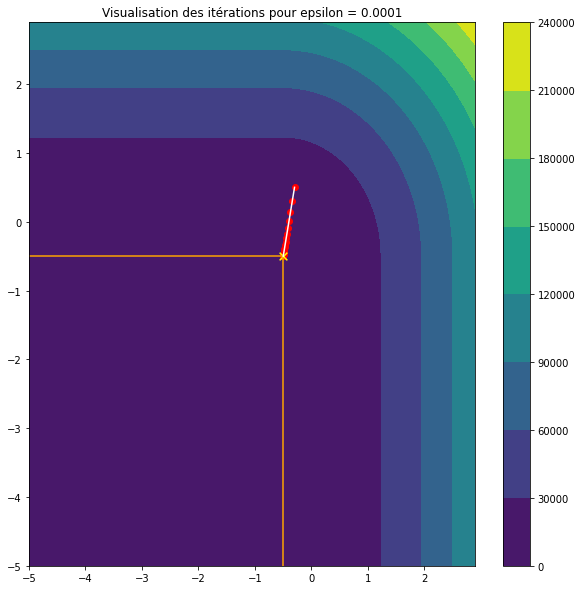

In [19]:
# Forte pénalisation.
epsilon = 1e-4

# Representation des lignes de niveau de J et du champ de vecteur du gradient

fig, ax = plt.subplots(1, 1, figsize = (10,10))
ax.set_title("Visualisation des itérations pour epsilon = " + str(epsilon))

x1 = np.arange(-5.0, 3.0, 0.1)
x2 = np.arange(-5.0, 3.0, 0.1)

xx1, xx2 = np.meshgrid(x1, x2);

z = 2*xx1**2 + 3*xx1*xx2 + 2*xx2**2 + (1./epsilon) * (max_matrix(xx1 + 1./2.)**2 + max_matrix(xx2 + 1./2.)**2);

h = plt.contourf(x1,x2,z)
fig.colorbar(h)

# Champs de vecteurs :
U = 4 * xx1 + 3 * xx2 + (2./epsilon) * max_matrix(xx1 + 1./2.)
V = 3 * xx1 + 4 * xx2 + (2./epsilon) * max_matrix(xx2 + 1./2.)

# Pas
pas = 1e-5

x_0 = [-0.3,0.5]

x_appro, err, it = grad_penalise(epsilon, pas, x_0)

plt.scatter( np.array(x_appro)[:,0] , np.array(x_appro)[:,1], color = 'red');
plt.plot( np.array(x_appro)[:,0] , np.array(x_appro)[:,1], color='white', linestyle = 'solid');
plt.scatter( -1./2. , -1./2., color = 'yellow',marker = 'x',s = 60);

ax.hlines(-1/2, -5, -1/2, colors='orange', linestyles='solid')
ax.vlines(-1/2, -5, -1/2, colors='orange', linestyles='solid', label=r'$\partial Q$');

Nous avons bien la convergence pour un epsilon très petit.

Nous allons refaire les memes étapes mais cette fois-ci avec une faible pénalisation, $\varepsilon = 0.5$.

In [20]:
x_0 = [-0.3, 0.5]

pas = 1e-2
epsilon = 0.5

x_appro, err, it = grad_penalise(epsilon, pas, x_0)
x_exact = (-1./2.)*np.ones(2)
print(np.shape(x_appro))

print("Iteration : ", it)

print("Good error ? :", (np.linalg.norm(x_appro[-1] - x_appro[-2]) < 1e-12) )

print("Solution = ", x_appro[-1]) # pas ok...

(472, 2)
Iteration :  470
Good error ? : True
Solution =  [-0.18181818 -0.18181818]


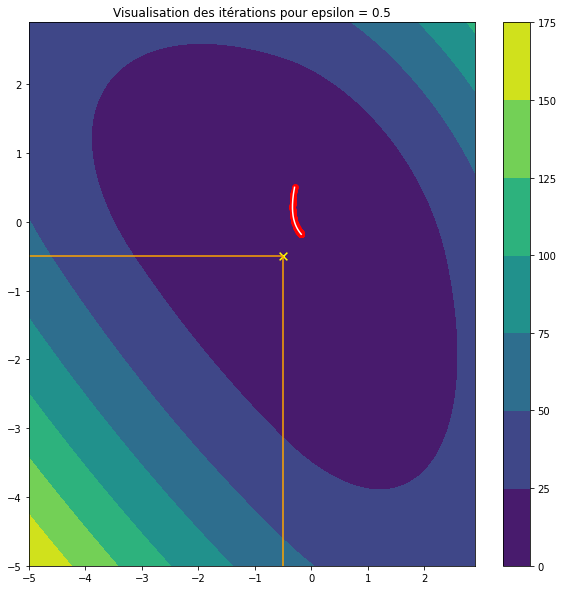

In [21]:
# Faible pénalisation.
epsilon = 0.5

# Representation des lignes de niveau de J et du champ de vecteur du gradient

fig, ax = plt.subplots(1, 1, figsize = (10,10))
ax.set_title("Visualisation des itérations pour epsilon = " + str(epsilon))

x1 = np.arange(-5.0, 3.0, 0.1)
x2 = np.arange(-5.0, 3.0, 0.1)

xx1, xx2 = np.meshgrid(x1, x2);

z = 2*xx1**2 + 3*xx1*xx2 + 2*xx2**2 + (1./epsilon) * (max_matrix(xx1 + 1./2.)**2 + max_matrix(xx2 + 1./2.)**2);

h = plt.contourf(x1,x2,z)
fig.colorbar(h)

# Champs de vecteurs :
U = 4 * xx1 + 3 * xx2 + (2./epsilon) * max_matrix(xx1 + 1./2.)
V = 3 * xx1 + 4 * xx2 + (2./epsilon) * max_matrix(xx2 + 1./2.)

# Pas
pas = 1e-2

x_0 = [-0.3, 0.5]

x_appro, err, it = grad_penalise(epsilon, pas, x_0)

plt.scatter( np.array(x_appro)[:,0] , np.array(x_appro)[:,1], color = 'red');
plt.plot( np.array(x_appro)[:,0] , np.array(x_appro)[:,1], color='white', linestyle = 'solid');
plt.scatter( -1./2. , -1./2., color = 'yellow',marker = 'x',s = 60);

ax.hlines(-1/2, -5, -1/2, colors='orange', linestyles='solid')
ax.vlines(-1/2, -5, -1/2, colors='orange', linestyles='solid', label=r'$\partial Q$');

Pour une pénalisation faible, nous voyons qu'on ne s'est pas arreté à notre solution du problème sous contrainte, mais on a quand meme convergence pour le problème d'optimisation sans contrainte de $J_{\epsilon}$. Notre epsilon n'est pas aussi proche de $0$ pour avoir la convergence souhaitée. Mais notre solution reste tout de meme assez proche de la solution exacte, il faut tout simplement faire tendre $\varepsilon$ vers $0$ . 